In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# https://www.kaggle.com/hugodarwood/epirecipes/data
raw_data = pd.read_csv('./data/epi_r.csv')
raw_data.head(3)

# Goal: see is if we can use the ingredient and keyword list to predict the rating

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#list(raw_data.columns)


In [7]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

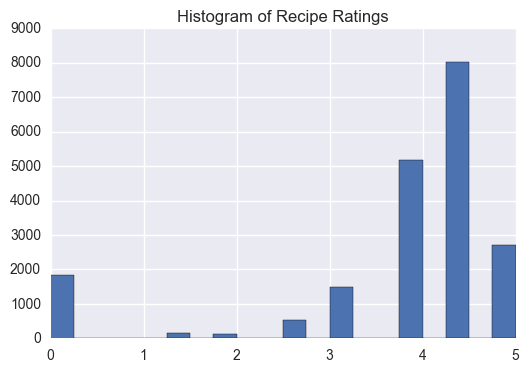

In [8]:
raw_data.rating.hist(bins=20)
plt.title("Histogram of Recipe Ratings")
plt.show()

In [9]:
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [12]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data.rating
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

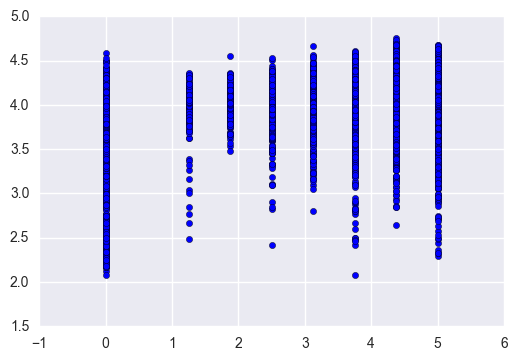

In [13]:
plt.scatter(Y, svr.predict(X))

In [ ]:
# svr.score(X, Y)

Questions

- How can we have an overfit that fits so poorly?
- Why didn't we use get dummies? https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html
- Let's do the classifier. 3.5 and above = high, otherwise = low
- Should we have a training and a testing data set
- How can I iterate more quickly, these models take for ever to load

In [20]:
raw_data["high_low"] = np.where(raw_data["rating"] >=3.5, "high", "low")

In [23]:
from sklearn.svm import SVC

X = raw_data.drop(['high_low', 'rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data['high_low']
svm = SVC(kernel = 'linear')
svm.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
# svm.score(X, Y)

KeyboardInterrupt: 

In [ ]:
# Let's try Lasso
from sklearn import linear_model

lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X, Y)
print(lass.score(X, Y))